<a href="https://colab.research.google.com/github/design-behavior/AIFFEL_quest_cr/blob/main/DataAnalysisWithPython/DataAnalysis_withPython_HandWriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- sklearn version :  1.6.1
----------------------------------------------------------------------------------------------------
<<digits 정보 이해하기>>
- 변수와 메서드 :  ['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
- 데이터셋 키 :  dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
- 특성 이름 :  ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6

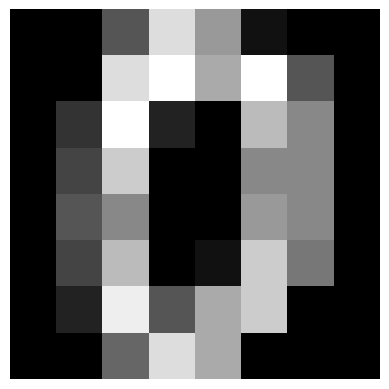

----------------------------------------------------------------------------------------------------


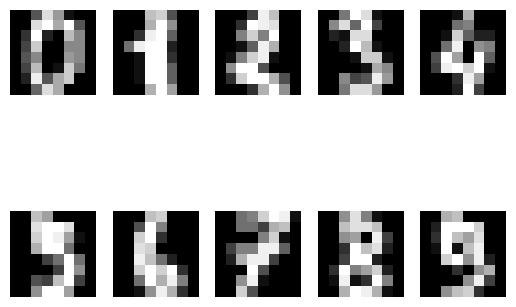

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
<<Decision Tree>>

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        31
           1       0.82      0.82      0.82        38
           2       0.72      0.87      0.79        38
           3       0.85      0.81      0.83        27
           4       0.97      0.78      0.86        41
           5       0.82      0.89      0.85        35
           6       0.85      0.89      0.87        38
           7       0.91      0.91      0.91        34
           8       0.74      0.74      0.74        35
           9       0.83      0.79      0.81        43

    accuracy                           0.84       360
   macro avg       0.85      0.84      0.84       360
weighted avg       0.85      0.84      0.84       360


confussion matrix
[

In [ ]:
# (1) 필요한 모듈 import하기
import sklearn
print("- sklearn version : ", sklearn.__version__)
print('-' * 100 )

from sklearn.datasets import load_digits #싸이킷런 데이터셋에 있는 digits를 불러오기 위한 import
from sklearn.model_selection import train_test_split #싸이킷런에 있는 데이터를 train과 test dataset으로 나누어주는 함수 import
from sklearn.metrics import classification_report #싸이킷런에 있는 분류 결과에 대한 시각화를 위한 import

# (2) 데이터 준비하기
digits = load_digits() #digits 데이터 전체를 불러온다.
digits_data = digits.data #digits 데이터의 data컬럼을 분류해 digits_data 변수에 담는다.
digits_label = digits.target #digits 데이터의 target컬럼을 분류해 digits_label 변수에 담는다.


# (3) 데이터 이해하기
print("<<digits 정보 이해하기>>")
# 데이터셋의 기본 정보 출력
print("- 변수와 메서드 : ", dir(digits))
print("- 데이터셋 키 : ", digits.keys())
print("- 특성 이름 : ", digits.feature_names)
print("- 타겟 이름 : ", digits.target_names)
print("- 데이터의 첫 번째 샘플 : ", digits_data[0])
print("- 타겟의 첫 번째 샘플 : ", digits_label[0])

# 데이터의 크기 확인
print("- 데이터 크기 : ", digits_data.shape)
print("- 타겟 크기 : ", digits_label.shape)

print()

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_class_counts = pd.DataFrame(pd.Series(digits.target).value_counts())
df_class_counts.sort_index()
print(df_class_counts.sort_index())

print()

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

print('-' * 100 )

for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
  plt.axis('off')
plt.show()

print('-' * 100 )

# 데이터 Describe
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.describe()

print('-' * 100 )

# (4) train, test 데이터 분리하기
#train_test_split()를 사용하여 X값, y값을 각각 train data와 test data로 나눈다. 함수에 들어 갈 파라미터로는 x,y가 들어가고
#test_size는 몇대몇으로 나눌지 정하는 옵션, random_state는 랜덤 패턴의 값을 지정한다.
X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=15)

from sklearn.tree import DecisionTreeClassifier #싸이킷런에 있는 결정트리분류기를 사용하기 위한 import
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위한 import
from sklearn import svm #Support Vector Machine을 사용하기 위해 import
from sklearn.linear_model import SGDClassifier #선형분류기인 SGDClassifier를 사용하기 위한 import
from sklearn.linear_model import LogisticRegression #선형분류기인 LogisticRegression를 사용하기 위한 import
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #싸이킷런에 있는 분류 결과에 대한 시각화를 위한 import

# (5) 다양한 모델로 학습 및 예측하기
# (5-1) Decision Tree 사용해 보기
print('<<Decision Tree>>')
print()
decision_tree = DecisionTreeClassifier(random_state=32) #결정트리분류기의 객체 생성
decision_tree.fit(X_train, y_train) #분류기에 x와 y의 훈련 데이터를 넣어 훈련
decision_tree_pred = decision_tree.predict(X_test) #훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인 => y_pred(decision_tree_pred)를 각 모델별로 새로 계산하도록 변경(결과가 잘못된 해석으로 이어질 수 있음을 예방하기 위해 / classification_report와 confusion_matrix가 올바른 예측값을 참조하도록 하기 위해)
print(classification_report(y_test, decision_tree_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred(decision_tree_pred) 값을 넣어 확인
print()
print("confussion matrix")
decision_tree_conf_matrix = confusion_matrix(y_test, decision_tree_pred)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
print(decision_tree_conf_matrix)
print()
print("Decision Tree Accuracy : ", decision_tree_accuracy*100,'\n')
print()
print('-' * 100 )


# (5-2) Random Forest 사용해 보기
print('<<Random Forest>>')
print()
random_forest = RandomForestClassifier(random_state=32) #RandomForest분류기의 객체 생성
random_forest.fit(X_train, y_train) #분류기에 x와 y의 훈련 데이터를 넣어 훈련
random_forest_pred = random_forest.predict(X_test) #훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인 => y_pred(random_forest_pred)를 각 모델별로 새로 계산하도록 변경(결과가 잘못된 해석으로 이어질 수 있음을 예방하기 위해 / classification_report와 confusion_matrix가 올바른 예측값을 참조하도록 하기 위해)
print(classification_report(y_test, random_forest_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred(random_forest_pred) 값을 넣어 확인
print()
print("confussion matrix")
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_pred)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
print(random_forest_conf_matrix)
print()
print("Random Forest Accuracy : ", random_forest_accuracy*100,'\n')
print()
print('-' * 100 )

# (5-3) SVM 사용해 보기
print('<<SVM_model>>')
print()
svm_model = svm.SVC(random_state=32) #분류기의 객체 생성
svm_model.fit(X_train, y_train) #분류기에 x와 y의 훈련 데이터를 넣어 훈련
svm_model_pred = svm_model.predict(X_test) #훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인 => y_pred(svm_model_pred)를 각 모델별로 새로 계산하도록 변경(결과가 잘못된 해석으로 이어질 수 있음을 예방하기 위해 / classification_report와 confusion_matrix가 올바른 예측값을 참조하도록 하기 위해)
print(classification_report(y_test, svm_model_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred(svm_model_pred) 값을 넣어 확인
print()
print("confussion matrix")
svm_model_conf_matrix = confusion_matrix(y_test, svm_model_pred)
svm_model_accuracy = accuracy_score(y_test, svm_model_pred)
print(svm_model_conf_matrix)
print()
print("SVM_model Accuracy : ", svm_model_accuracy*100,'\n')
print()
print('-' * 100 )

# (5-4) SGD Classifier 사용해 보기
print('<<SGD Classifier>>')
print()
sgd_model = SGDClassifier(random_state=32) #분류기의 객체 생성
sgd_model.fit(X_train, y_train) #분류기에 x와 y의 훈련 데이터를 넣어 훈련
sgd_model_pred = sgd_model.predict(X_test) #훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인 => y_pred(sgd_model_pred)를 각 모델별로 새로 계산하도록 변경(결과가 잘못된 해석으로 이어질 수 있음을 예방하기 위해 / classification_report와 confusion_matrix가 올바른 예측값을 참조하도록 하기 위해)
print(classification_report(y_test, sgd_model_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred(sgd_model_pred) 값을 넣어 확인
print()
print("confussion matrix")
sgd_model_conf_matrix = confusion_matrix(y_test, sgd_model_pred)
sgd_model_accuracy = accuracy_score(y_test, sgd_model_pred)
print(sgd_model_conf_matrix)
print()
print("SGD Classifier Accuracy : ", sgd_model_accuracy*100,'\n')
print()
print('-' * 100 )


# (5-5) Logistic Regression 사용해 보기
print('<<Logistic Regression>>')
print()
logistic_model = LogisticRegression(random_state=32, max_iter=1000) #분류기의 객체 생성 (디폴트 max_iter 값이 충분하지 않을 수 있어, max_iter=1000을 설정해 경고 방지)
logistic_model.fit(X_train, y_train) #분류기에 x와 y의 훈련 데이터를 넣어 훈련
logistic_model_pred = logistic_model.predict(X_test) #훈련된 분류기에 X_test라는 테스트 데이터셋을 넣어 얼마나 예측했는지 확인 => y_pred(logistic_model_pred)를 각 모델별로 새로 계산하도록 변경(결과가 잘못된 해석으로 이어질 수 있음을 예방하기 위해 / classification_report와 confusion_matrix가 올바른 예측값을 참조하도록 하기 위해)
print(classification_report(y_test, logistic_model_pred)) # 결과를 지표로 확인하기 위해 classification_report를 활용해 y_test, y_pred(logistic_model_pred) 값을 넣어 확인
print()
print("confussion matrix")
logistic_model_conf_matrix = confusion_matrix(y_test, logistic_model_pred)
logistic_model_accuracy = accuracy_score(y_test, logistic_model_pred)
print(logistic_model_conf_matrix)
print()
print("Logistic Regression Accuracy : ", logistic_model_accuracy*100,'\n')
print()
print('-' * 100 )

# 모델 평가

1. Decision Tree
* precision/recall/f1-score : 평균값이 각 0.85/0.84/0.84
* confussion matrix :
[[29  0  0  0  0  0  0  0  2  0]
 [ 0 31  3  1  1  0  1  0  1  0]
 [ 0  1 33  1  0  1  0  0  1  1]
 [ 0  0  0 22  0  1  1  0  2  1]
 [ 0  0  0  1 32  0  4  3  0  1]
 [ 0  0  3  0  0 31  0  0  1  0]
 [ 0  1  2  0  0  1 34  0  0  0]
 [ 0  0  0  1  0  0  0 31  0  2]
 [ 0  2  3  0  0  2  0  0 26  2]
 [ 0  3  2  0  0  2  0  0  2 34]]

* Accuracy : 약 84.17%
---

2. Random Forest
* precision/recall/f1-score : 평균값이 각 0.98/0.98/0.98
* confussion matrix :
[[29  0  0  0  2  0  0  0  0  0]
 [ 0 37  0  0  0  1  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 1  1  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  0  1 42]]

* Accuracy : 약 97.78%
---

3. SVM_model
* precision/recall/f1-score : 평균값이 각 0.98/0.98/0.98
* confussion matrix :
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  0  1]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 42]]

* Accuracy : 약 98.33%
---

4. SGD Classifier
* precision/recall/f1-score : 평균값이 각 0.95/0.94/0.94
* confussion matrix :
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 31  0  0  0  0  0  0  7  0]
 [ 0  0 36  0  0  0  0  0  2  0]
 [ 0  0  0 23  0  1  0  0  2  1]
 [ 0  0  0  0 40  0  0  0  1  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  1  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  0  0  0  0  0 34  0]
 [ 0  0  0  1  0  0  0  1  4 37]]

* Accuracy : 약 93.61%
---

5. Logistic Regression
* precision/recall/f1-score : 평균값이 각 0.97/0.97/0.97
* confussion matrix :
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  1  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  1  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  1  0]
 [ 0  0  0  0  0 34  0  0  0  1]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  1  0  0  0 34  0]
 [ 0  0  0  1  0  0  0  0  1 41]]

* Accuracy : 약 96.94%
---
# 선택한 평가지표
* 정밀도, 재현율, 정확도가 가장 좋은 SVM_model이 적절한 모델인 것으로 판단
---